In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import cv2
import PIL
import os 
import pathlib

In [2]:
_TRAIN_URL = "https://storage.googleapis.com/ibeans/train.zip"
_VALIDATION_URL = "https://storage.googleapis.com/ibeans/validation.zip"
_TEST_URL = "https://storage.googleapis.com/ibeans/test.zip"

train_dir = tf.keras.utils.get_file('train_dir',origin=_TRAIN_URL,extract=True, cache_dir='.',untar=True)
val_dir = tf.keras.utils.get_file('val_dir', origin=_VALIDATION_URL,extract=True,cache_dir='.', untar=True)
test_dir = tf.keras.utils.get_file('test_dir',origin=_TEST_URL,extract=True,cache_dir='.',untar=True)

In [3]:
train_dir = f'{train_dir}\\train'
test_dir = f'{test_dir}\\test'
val_dir = f'{val_dir}\\validation'

In [4]:
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)
val_dir = pathlib.Path(val_dir)

In [5]:
train_dir

WindowsPath('datasets/train_dir/train')

In [6]:
healthy_train = list(train_dir.glob('healthy/*'))
healthy_train

[WindowsPath('datasets/train_dir/train/healthy/healthy_train.0.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.1.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.10.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.100.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.101.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.102.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.103.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.104.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.105.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.106.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.107.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.108.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.109.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.11.jpg')

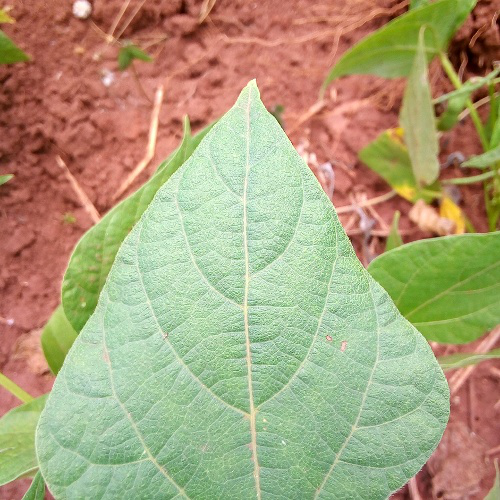

In [8]:
PIL.Image.open(str(healthy_train[3]))

In [58]:
beans_image_train = {
    'healthy' : list(train_dir.glob('healthy/*')),
    'bean_rust' : list(train_dir.glob('bean_rust/*')),
    'angular_leaf_spot' : list(train_dir.glob('angular_leaf_spot/*'))}
beans_image_val = {

    'healthy' : list(val_dir.glob('healthy/*')),
    'bean_rust' : list(val_dir.glob('bean_rust/*')),
    'angular_leaf_spot' : list(val_dir.glob('angular_leaf_spot/*'))}
beans_image_test = {

    'healthy' : list(test_dir.glob('healthy/*')),
    'bean_rust' : list(test_dir.glob('bean_rust/*')),
    'angular_leaf_spot':list(test_dir.glob('angular_leaf_spot/*'))
}

In [59]:
beans_labels_dict = {
    'healthy':0,
    'bean_rust':1,
    'angular_leaf_spot':2
}

In [60]:
train_dir

WindowsPath('datasets/train_dir/train')

In [61]:
beans_image_train['healthy']

[WindowsPath('datasets/train_dir/train/healthy/healthy_train.0.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.1.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.10.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.100.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.101.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.102.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.103.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.104.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.105.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.106.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.107.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.108.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.109.jpg'),
 WindowsPath('datasets/train_dir/train/healthy/healthy_train.11.jpg')

In [63]:
X_train, y_train = [], []
for name, images in beans_image_train.items():
    for image in images:
        img = cv2.imread(str(image))
        X_train.append(img)
        y_train.append(beans_labels_dict[name])

X_val, y_val = [],[]
for name, images in beans_image_val.items():
        for image in images:
            img = cv2.imread(str(image))
            X_val.append(img)
            y_val.append(beans_labels_dict[name])

X_test, y_test = [], []
for name, images in beans_image_test.items():
    for image in images:
        img = cv2.imread(str(image))
        X_test.append(img)
        y_test.append(beans_labels_dict[name])


In [64]:
X_test = np.array(X_test)

In [65]:
X_train=np.array(X_train)

In [66]:
X_val = np.array(X_val)

In [68]:
X_train.shape

(1034, 500, 500, 3)

In [79]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [69]:
X_test.shape

(128, 500, 500, 3)

In [70]:
X_val.shape

(133, 500, 500, 3)

In [72]:
X_train_scaled = X_train /255
X_test_scaled = X_test / 255
X_val_scaled = X_val /255

In [73]:
num_classes=3

In [76]:
model1 = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax')
])

model1.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
model1.fit(X_train_scaled,y_train, epochs=10)

Epoch 1/10


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


33/33 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3688 - loss: 6.3927
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5962 - loss: 0.8931
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7179 - loss: 0.6724
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8013 - loss: 0.4736
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.8758 - loss: 0.3407
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9605 - loss: 0.1452
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9764 - loss: 0.0861
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9975 - loss: 0.0230
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 1.0000 - loss: 0.0080
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 1.0000 - loss: 0.0072


In [81]:
model1.evaluate(X_test_scaled,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 575ms/step - accuracy: 0.7406 - loss: 1.2381


[1.2476962804794312, 0.71875]

In [82]:
from sklearn.metrics import classification_report

In [89]:
y_pred1 = model1.predict(X_test_scaled)
y_pred_label1 = [np.argmax(i) for i in y_pred1]
print('classification report: ')
print(classification_report(y_test,y_pred_label1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step
classification report: 
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.66      0.58      0.62        43
           2       0.72      0.77      0.74        43

    accuracy                           0.72       128
   macro avg       0.72      0.72      0.72       128
weighted avg       0.72      0.72      0.72       128



In [85]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
y_pred1

array([[1.00000000e+00, 4.29193081e-09, 2.46969459e-12],
       [9.99990582e-01, 9.34350101e-06, 1.40533416e-07],
       [9.72746313e-01, 1.74649693e-02, 9.78870597e-03],
       [9.44409072e-01, 4.72570285e-02, 8.33395030e-03],
       [9.93722141e-01, 6.23341231e-03, 4.44220022e-05],
       [7.81756733e-03, 4.55935551e-05, 9.92136955e-01],
       [9.99991536e-01, 5.48199705e-06, 2.96821349e-06],
       [9.99999881e-01, 3.35278028e-10, 1.33748713e-07],
       [5.00284061e-02, 5.04295051e-01, 4.45676565e-01],
       [9.99603808e-01, 3.88547167e-04, 7.67743495e-06],
       [1.00000000e+00, 3.43616202e-09, 3.73834652e-08],
       [9.99958992e-01, 2.36034302e-05, 1.73506469e-05],
       [1.00000000e+00, 4.36074430e-08, 1.54752933e-10],
       [9.99993086e-01, 5.70846805e-06, 1.20786558e-06],
       [9.99998093e-01, 9.88836319e-08, 1.72949331e-06],
       [9.99987125e-01, 2.57086725e-07, 1.26140731e-05],
       [6.87661231e-01, 2.75473297e-01, 3.68655324e-02],
       [1.65819272e-01, 3.38792

In [96]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip(mode='horizontal_and_vertical',seed=3),
])

In [98]:
model2 = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes)   
])
model2.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [99]:
model2.fit(X_train_scaled, y_train, epochs=10)

MemoryError: Unable to allocate 2.89 GiB for an array with shape (1034, 500, 500, 3) and data type float32

In [ ]:
model2.evaluate(X_test_scaled,y_test)